In [1]:
from jupyter_utils import change_path_to_parent

change_path_to_parent()
# __package__ = 'notebooks'
from loss_functions.logistic_regression import LogisticRegression
from first_order.gd import Gd

In [2]:
import numpy as np
import numpy.linalg as la
from sklearn.datasets import load_svmlight_file

data_path = '../datasets/mushrooms'

it_max = 2000

data = load_svmlight_file(data_path)
A, b = data[0].toarray(), data[1]
loss = LogisticRegression(A, b)
n, dim = A.shape
L = loss.smoothness()
l2 = L / (1 * n)
x0 = np.zeros(dim)

In [3]:
gd = Gd(loss=loss, it_max=it_max)
gd.run(x0=x0)

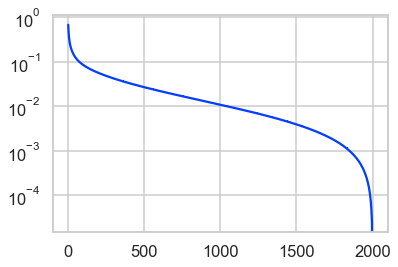

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="talk", palette=sns.color_palette("bright"), color_codes=False)
gd.plot_losses()
plt.yscale('log')